In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data=pd.read_csv('/content/drive/MyDrive/2018Floor3_features_selected.csv')

In [7]:
data.head()

,z1_AC2(kW),z1_AC4(kW),z1_Plug(kW),z1_S1(RH%),z1_S1(lux),z2_AC1(kW),z2_Light(kW),z2_Plug(kW),z2_S1(RH%),z2_S1(lux),...,z4_AC1(kW),z4_Light(kW),z4_Plug(kW),z4_S1(RH%),z4_S1(lux),z5_AC1(kW),z5_Light(kW),z5_Plug(kW),z5_S1(RH%),z5_S1(lux)
0,0.0,8.74,0.22,62.50,0.0,0.0,0.0,0.15,65.74,0.0,...,0.0,0.0,0.07,0.0,0.0,0.0,0.0,0.15,62.86,0.0
1,0.0,8.74,0.23,62.50,0.0,0.0,0.0,0.15,65.74,0.0,...,0.0,0.0,0.07,0.0,0.0,0.0,0.0,0.14,62.87,0.0
2,0.0,8.61,0.22,62.50,0.0,0.0,0.0,0.15,65.74,0.0,...,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.14,62.88,0.0
3,0.0,8.81,0.23,62.50,0.0,0.0,0.0,0.15,65.73,0.0,...,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.14,62.88,0.0
4,0.0,8.89,0.22,62.51,0.0,0.0,0.0,0.15,65.73,0.0,...,0.0,0.0,0.07,0.0,0.0,0.0,0.0,0.14,62.88,0.0


In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, classification_report
from sklearn.model_selection import ParameterGrid
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [9]:
features=list(data.columns)

In [10]:
features

['z1_AC2(kW)',
 'z1_AC4(kW)',
 'z1_Plug(kW)',
 'z1_S1(RH%)',
 'z1_S1(lux)',
 'z2_AC1(kW)',
 'z2_Light(kW)',
 'z2_Plug(kW)',
 'z2_S1(RH%)',
 'z2_S1(lux)',
 'z3_Light(kW)',
 'z3_Plug(kW)',
 'z4_AC1(kW)',
 'z4_Light(kW)',
 'z4_Plug(kW)',
 'z4_S1(RH%)',
 'z4_S1(lux)',
 'z5_AC1(kW)',
 'z5_Light(kW)',
 'z5_Plug(kW)',
 'z5_S1(RH%)',
 'z5_S1(lux)']

In [11]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [12]:
kmeans_model=KMeans(n_clusters=2,random_state=42)

In [13]:
data['abnormal_kmeans'] = kmeans_model.fit_predict(data_scaled)

In [14]:
data

,z1_AC2(kW),z1_AC4(kW),z1_Plug(kW),z1_S1(RH%),z1_S1(lux),z2_AC1(kW),z2_Light(kW),z2_Plug(kW),z2_S1(RH%),z2_S1(lux),...,z4_Light(kW),z4_Plug(kW),z4_S1(RH%),z4_S1(lux),z5_AC1(kW),z5_Light(kW),z5_Plug(kW),z5_S1(RH%),z5_S1(lux),abnormal_kmeans
0,0.0,8.74,0.22,62.50,0.0,0.0,0.0,0.15,65.74,0.0,...,0.0,0.07,0.0,0.0,0.0,0.0,0.15,62.86,0.0,1
1,0.0,8.74,0.23,62.50,0.0,0.0,0.0,0.15,65.74,0.0,...,0.0,0.07,0.0,0.0,0.0,0.0,0.14,62.87,0.0,1
2,0.0,8.61,0.22,62.50,0.0,0.0,0.0,0.15,65.74,0.0,...,0.0,0.08,0.0,0.0,0.0,0.0,0.14,62.88,0.0,1
3,0.0,8.81,0.23,62.50,0.0,0.0,0.0,0.15,65.73,0.0,...,0.0,0.08,0.0,0.0,0.0,0.0,0.14,62.88,0.0,1
4,0.0,8.89,0.22,62.51,0.0,0.0,0.0,0.15,65.73,0.0,...,0.0,0.07,0.0,0.0,0.0,0.0,0.14,62.88,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264955,0.0,0.00,0.27,0.00,0.0,0.0,0.0,0.02,0.00,0.0,...,0.0,0.05,0.0,0.0,0.0,0.0,0.04,0.00,0.0,1
264956,0.0,0.00,0.27,0.00,0.0,0.0,0.0,0.02,0.00,0.0,...,0.0,0.05,0.0,0.0,0.0,0.0,0.04,0.00,0.0,1
264957,0.0,0.00,0.23,0.00,0.0,0.0,0.0,0.02,0.00,0.0,...,0.0,0.05,0.0,0.0,0.0,0.0,0.04,0.00,0.0,1
264958,0.0,0.00,0.30,0.00,0.0,0.0,0.0,0.03,0.00,0.0,...,0.0,0.05,0.0,0.0,0.0,0.0,0.04,0.00,0.0,1


In [15]:
data['abnormal_kmeans'].value_counts()

,count
abnormal_kmeans,
1,204424
0,60536


In [16]:
data['abnormal_kmeans'] = data['abnormal_kmeans'].apply(lambda x: 1 if x == 0 else 0)

In [17]:
data['abnormal_kmeans'].value_counts()

,count
abnormal_kmeans,
0,204424
1,60536


In [18]:
pca=PCA(n_components=2)
data_pca=pca.fit_transform(data_scaled)

In [19]:
data_pca[:,0]

array([-1.3421698 , -1.35189264, -1.35219068, ..., -2.4937882 ,
       -2.4666002 , -2.4839602 ])

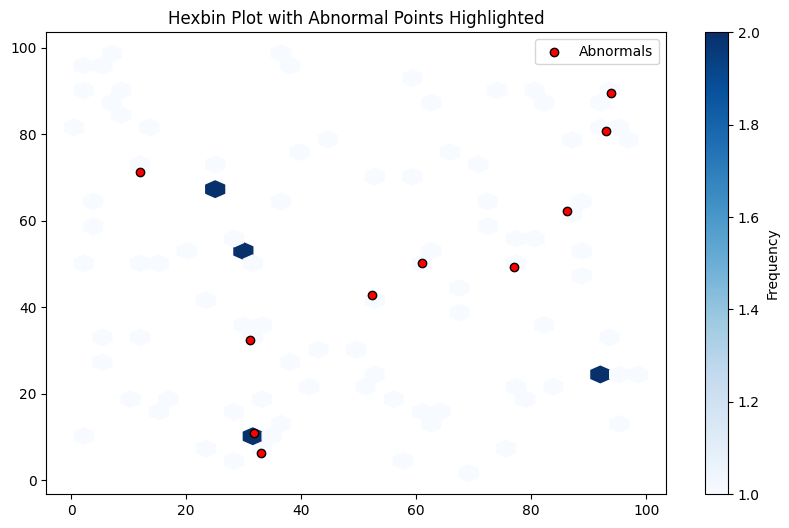

In [20]:
np.random.seed(42)
data_pca = np.random.rand(100, 2) * 100
abnormal_kmeans = np.random.choice([0, 1], size=100, p=[0.9, 0.1])
plt.figure(figsize=(10, 6))
plt.hexbin(data_pca[:, 0], data_pca[:, 1], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Frequency')
abnormal_points = data_pca[abnormal_kmeans == 1]
plt.scatter(abnormal_points[:, 0], abnormal_points[:, 1], color='red', label='Abnormals', edgecolor='black')
plt.title('Hexbin Plot with Abnormal Points Highlighted')
plt.legend()
plt.show()


In [21]:
data['abnormal']=data['abnormal_kmeans']

In [22]:
data.drop(['abnormal_kmeans'],axis=1).to_csv('/content/2018Floor3_features_selected.csv',index=False)

In [23]:
from sklearn.pipeline import Pipeline

In [24]:
data=data[features]

In [25]:
data

,z1_AC2(kW),z1_AC4(kW),z1_Plug(kW),z1_S1(RH%),z1_S1(lux),z2_AC1(kW),z2_Light(kW),z2_Plug(kW),z2_S1(RH%),z2_S1(lux),...,z4_AC1(kW),z4_Light(kW),z4_Plug(kW),z4_S1(RH%),z4_S1(lux),z5_AC1(kW),z5_Light(kW),z5_Plug(kW),z5_S1(RH%),z5_S1(lux)
0,0.0,8.74,0.22,62.50,0.0,0.0,0.0,0.15,65.74,0.0,...,0.0,0.0,0.07,0.0,0.0,0.0,0.0,0.15,62.86,0.0
1,0.0,8.74,0.23,62.50,0.0,0.0,0.0,0.15,65.74,0.0,...,0.0,0.0,0.07,0.0,0.0,0.0,0.0,0.14,62.87,0.0
2,0.0,8.61,0.22,62.50,0.0,0.0,0.0,0.15,65.74,0.0,...,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.14,62.88,0.0
3,0.0,8.81,0.23,62.50,0.0,0.0,0.0,0.15,65.73,0.0,...,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.14,62.88,0.0
4,0.0,8.89,0.22,62.51,0.0,0.0,0.0,0.15,65.73,0.0,...,0.0,0.0,0.07,0.0,0.0,0.0,0.0,0.14,62.88,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264955,0.0,0.00,0.27,0.00,0.0,0.0,0.0,0.02,0.00,0.0,...,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.04,0.00,0.0
264956,0.0,0.00,0.27,0.00,0.0,0.0,0.0,0.02,0.00,0.0,...,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.04,0.00,0.0
264957,0.0,0.00,0.23,0.00,0.0,0.0,0.0,0.02,0.00,0.0,...,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.04,0.00,0.0
264958,0.0,0.00,0.30,0.00,0.0,0.0,0.0,0.03,0.00,0.0,...,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.04,0.00,0.0


In [26]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KMeans(n_clusters=2,random_state=42))
])

In [27]:
data['abnormal_pipeline'] = pipeline.fit_predict(data)
data['abnormal_pipeline'] = data['abnormal_pipeline'].apply(lambda x: 1 if x == 0 else 0)

<ipython-input-27-2573abb0b2bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['abnormal_pipeline'] = pipeline.fit_predict(data)
<ipython-input-27-2573abb0b2bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['abnormal_pipeline'] = data['abnormal_pipeline'].apply(lambda x: 1 if x == 0 else 0)


In [28]:
pca=PCA(n_components=2)
data_pca=pca.fit_transform(data_scaled)

In [29]:
data_pca[:,0]

array([-1.3421698 , -1.35189264, -1.35219068, ..., -2.4937882 ,
       -2.4666002 , -2.4839602 ])

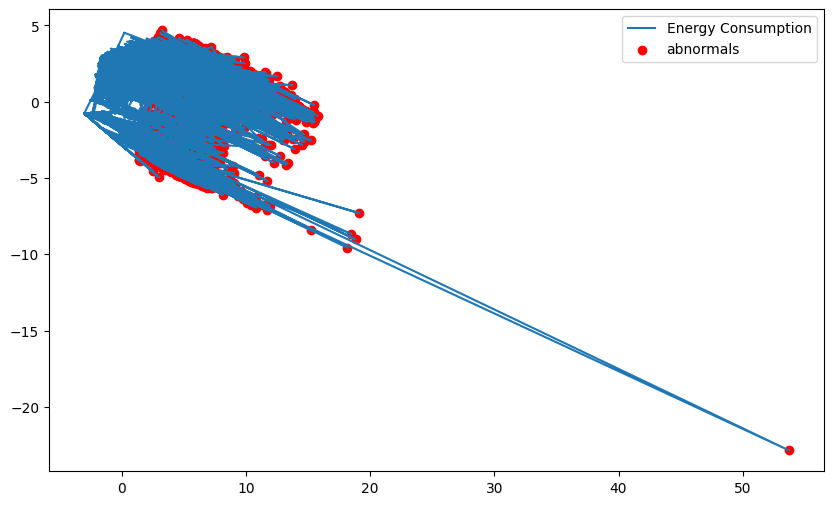

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(data_pca[:,0], data_pca[:,1], label='Energy Consumption')
plt.scatter(data_pca[:,0][data['abnormal_pipeline'] == 1],data_pca[:,1][data['abnormal_pipeline'] == 1], color='red', label='abnormals')
plt.legend()
plt.show()

In [31]:
import pickle

with open('/content/drive/MyDrive/Abnormal Detection Model/model_kmeans.pkl', 'wb') as f:
  pickle.dump(kmeans_model, f)

with open('/content/drive/MyDrive/Abnormal Detection Model/kmeans_pipeline.pkl', 'wb') as f:
  pickle.dump(pipeline, f)

